In [2]:
# import library
import pandas as pd
import numpy as np

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
df = pd.read_csv("/content/drive/MyDrive/Student Placement/placement.csv")

In [8]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [10]:
df.shape


(100, 4)

In [13]:
df = df.iloc[:,1:]

In [14]:
df.head()


,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [15]:
import matplotlib.pyplot as plt

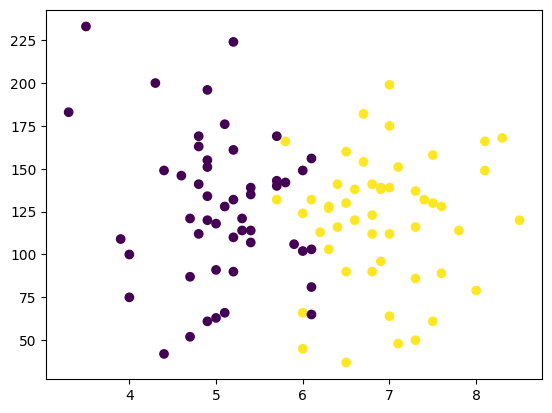

In [16]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [17]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [18]:

X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [19]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [21]:
X.shape

(100, 2)

In [20]:
y.shape

(100,)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [24]:
X_train

,cgpa,iq
79,6.5,90.0
98,6.3,103.0
71,6.1,132.0
15,5.1,176.0
54,6.4,141.0
...,...,...
13,6.4,116.0
17,3.3,183.0
74,6.7,154.0
33,6.0,149.0


In [25]:
y_train


79    1
98    1
71    1
15    0
54    1
     ..
13    1
17    0
74    1
33    0
66    1
Name: placement, Length: 90, dtype: int64

In [26]:
X_test

,cgpa,iq
97,6.7,182.0
94,4.7,52.0
40,4.9,134.0
44,7.5,61.0
12,5.4,139.0
16,5.2,224.0
63,6.3,128.0
60,6.9,139.0
88,4.4,149.0
3,7.4,132.0


In [27]:
from sklearn.preprocessing import StandardScaler


In [28]:
scaler = StandardScaler()


In [29]:
X_train = scaler.fit_transform(X_train)


In [30]:
X_train

array([[ 0.44064543, -0.84031887],
       [ 0.26555453, -0.50338499],
       [ 0.09046363,  0.24823676],
       [-0.78499086,  1.38862838],
       [ 0.35309998,  0.48149868],
       [-0.78499086, -1.46235067],
       [ 1.40364536,  0.1445648 ],
       [ 0.00291818,  0.04089283],
       [-1.2227181 ,  0.61108864],
       [-1.397809  , -2.08438246],
       [-0.69744541, -0.32195905],
       [ 0.96591812,  0.7406786 ],
       [-0.87253631, -1.54010464],
       [ 1.31609991,  0.19640078],
       [-0.78499086,  0.1445648 ],
       [-0.17217272,  0.50741667],
       [ 0.17800908, -0.24420507],
       [ 0.87837267,  1.98474218],
       [-1.0476272 , -0.27012307],
       [ 0.70328177, -0.84031887],
       [ 0.09046363,  0.87026855],
       [-0.96008176, -0.06277913],
       [-0.96008176,  1.90698821],
       [-0.60989996, -0.03686114],
       [-0.08462727, -0.42563101],
       [ 0.26555453,  0.1186468 ],
       [-1.74799079, -1.22908874],
       [ 0.44064543,  0.19640078],
       [-0.60989996,

In [31]:
X_test = scaler.transform(X_test)


In [32]:
X_test


array([[ 0.61573632,  1.54413633],
       [-1.13517265, -1.82520254],
       [-0.96008176,  0.30007274],
       [ 1.31609991, -1.59194062],
       [-0.52235451,  0.4296627 ],
       [-0.69744541,  2.63269196],
       [ 0.26555453,  0.1445648 ],
       [ 0.79082722,  0.4296627 ],
       [-1.397809  ,  0.68884261],
       [ 1.22855446,  0.24823676]])

In [33]:
from sklearn.linear_model import LogisticRegression


In [34]:
clf = LogisticRegression()


In [46]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(X_test)

In [47]:
y_test

97    1
94    0
40    0
44    1
12    0
16    0
63    1
60    1
88    0
3     1
Name: placement, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score


In [49]:
accuracy_score(y_test,y_pred)


1.0

In [50]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

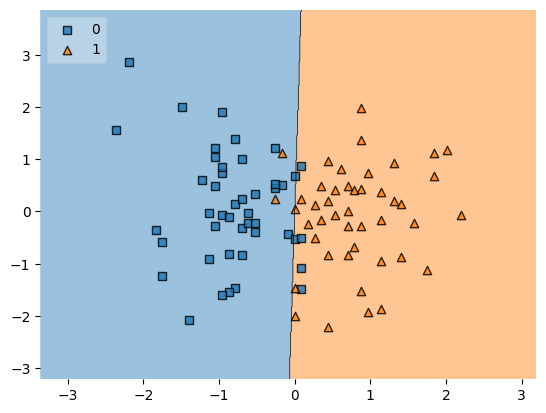

In [51]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)


In [52]:
import pickle


In [53]:
pickle.dump(clf,open('model.pkl','wb'))
